In [220]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas
import matplotlib.patheffects as path_effects

import svgutils.compose as sc


In [112]:
# Load data from ETH-UNI-30bps pool
ETHUNI30=pandas.read_gbq("SELECT DISTINCT * FROM `arcane-world-371019.First_sync.1` WHERE address='0x1d42064fc4beb5f8aaf85f4617ae8b3b5b8bd801' ORDER BY block_number, transaction_index  ", "arcane-world-371019")


In [113]:
ticks = []
sqrtPrice = []
timeStamp = []
for index, row in ETHUNI30.iterrows():
    ticks.append(row['tick'])
    sqrtPrice.append(int(row['sqrtPrice'], 16))
    timeStamp.append(row['block_number'])
ticks = np.array(ticks)
sqrtPrice = np.array(sqrtPrice)
timeStamp = np.array(timeStamp)
price = (sqrtPrice/2**96)**2

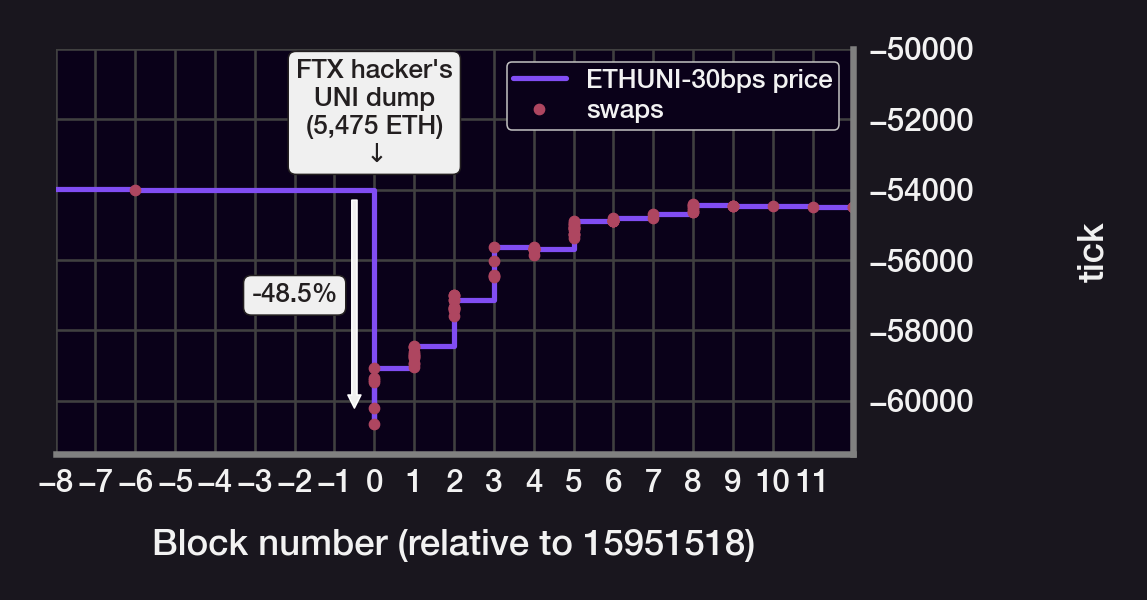

In [245]:
plt.style.use('../stylesheet/panoptic-dark-16:9.mplstyle')

plt.step(timeStamp-15951518, ticks, where='post', lw=1, label='ETHUNI-30bps price')
plt.plot(timeStamp-15951518, ticks, 'o', label='swaps')
plt.xlim((15951515-15951518, 15951530-15951518))
plt.ylim((-61500, -50000))
plt.xticks(np.arange(15951510-15951518, 15951530-15951518))

plt.text(0, -53200, 'FTX hacker\'s\nUNI dump\n(5,475 ETH)\n$↓$', fontsize=5, ha='center', color='#231f20', bbox=dict(boxstyle='round', fc="#f0f0f0", ec="#231f20"))
plt.annotate('', (-0.5, -60500),
                (-0.5, -54000),
                ha="right", va="center",
                size=5,
                arrowprops=dict(arrowstyle='simple',
                                fc="#f0f0f0", ec="w",
                                ))
plt.text(-2, -57000, '-48.5%', fontsize=5, ha='center', va='center', color='#231f20', bbox=dict(boxstyle='round', fc="#f0f0f0", ec="#231f20"))

# update tick labels and add legend
plt.xlabel('Block number (relative to 15951518)')
plt.ylabel('tick',labelpad=-202.5)
plt.legend()

# Save as a temp svg file
plt.savefig('temp.svg')

# Add background watermark
sc.Figure("1200px", "675px", 
    sc.Panel(sc.SVG("temp.svg")),
    sc.Panel(sc.SVG("logo-bg2.svg").scale(0.192))
    ).save("UNI-dump.svg")